# ENCI 619.4 - Traffic Incidents and Volume Initial Phase Preprocessing and Analysis

## Data Preprocessing

As I have multiple CSV files, I attempt to clean my data by exporting it to geojson files. 
Due to the nature of the routes and databases that I am using, I have performed a mix of manual and script based cleaning.
the datasets that i have 

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.wkt import loads

# Load CSV file
df = pd.read_csv("Data Preprocessing\Traffic_Volumes_for_2023_20250309.csv")

# Convert MULTILINESTRING (WKT) to geometry
df["geometry"] = df["multilinestring"].apply(loads)

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")

# Save as GeoJSON
gdf.to_file("Traffic-Volume.geojson", driver="GeoJSON")


In [ ]:
# Load CSV file
df = pd.read_csv(" ")

# Convert MULTILINESTRING (WKT) to geometry
df["geometry"] = df["MULTILINESTRING"].apply(loads) # how it's written matters 

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")

# Save as GeoJSON
gdf.to_file("Calgary_Traffic_Volume.geojson", driver="GeoJSON")

### Cleaning TrafficIncidents.csv

In [31]:
import csv
import re

def filter_csv(input_file, output_file):
    # Keywords to include - any of these should include the row
    include_keywords = [
        'vehicle', 'vehicles', 'car', 'cars', 'truck', 'trucks',
        'blocked lane', 'blocked lanes', 'lane blocked', 'lanes blocked',
        'blocking', 'blocked', 'traffic', 'collision', 'crash', 'accident', 'breakdown', 'stalled'
    ]
    
    # Keywords to exclude - any of these should exclude the row
    exclude_keywords = [
        'construction', 'weather', 'equipment', 'maintenance',
        'road work', 'roadwork', 'repair', 'rain', 'snow', 'ice', 'storm', 'hazardous', 'traffic light', 'traffic signal', 'railway'
    ]
    
    # Valid years
    valid_years = ['2023', '2024', '2025']
    
    filtered_rows = []
    unique_descriptions = set()
    
    try:
        with open(input_file, 'r', newline='', encoding='utf-8') as infile:
            reader = csv.DictReader(infile)
            fieldnames = reader.fieldnames
            
            if not fieldnames:
                print("Error: CSV file has no headers")
                return
            
            date_column = 'START_DT'
            description_column = 'DESCRIPTION'
            
            if date_column not in fieldnames:
                print(f"Error: Could not find the column '{date_column}'")
                return
            
            if description_column not in fieldnames:
                print(f"Error: Could not find the column '{description_column}'")
                return
            
            # For debugging
            total_rows = 0
            year_filtered = 0
            include_filtered = 0
            exclude_filtered = 0
            
            # Process each row
            for row in reader:
                total_rows += 1
                
                # Extract year from the date format "2022-06-21 7:31"
                try:
                    date_value = row[date_column]
                    year = date_value.split('/')[0]
                    
                    # Skip if not in our valid years list
                    if year not in valid_years:
                        year_filtered += 1
                        continue
                    
                    # Get the description and convert to lowercase for case-insensitive matching
                    description = row[description_column].lower()
                    
                    # Check if any include keyword is present in the description
                    include_match = False
                    for keyword in include_keywords:
                        if keyword.lower() in description:
                            include_match = True
                            break
                    
                    if not include_match:
                        include_filtered += 1
                        continue
                    
                    # Check if any exclude keyword is present in the description
                    exclude_match = False
                    for keyword in exclude_keywords:
                        if keyword.lower() in description:
                            exclude_match = True
                            break
                    
                    if exclude_match:
                        exclude_filtered += 1
                        continue
                    
                    # If we got here, this row should be included
                    filtered_rows.append(row)
                    
                    # Add to our set of unique descriptions
                    unique_descriptions.add(row[description_column])
                
                except Exception as e:
                    print(f"Warning: Error processing row: {e}")
                    continue
        
        # Write the filtered data to the output file
        with open(output_file, 'w', newline='', encoding='utf-8') as outfile:
            writer = csv.DictWriter(outfile, fieldnames=fieldnames)
            writer.writeheader()
            writer.writerows(filtered_rows)
        
        # Print filter statistics
        print(f"\nFilter statistics:")
        print(f"Total rows processed: {total_rows}")
        print(f"Rows filtered out by year: {year_filtered}")
        print(f"Rows filtered out by missing include keywords: {include_filtered}")
        print(f"Rows filtered out by having exclude keywords: {exclude_filtered}")
        print(f"Rows kept after filtering: {len(filtered_rows)}")
        
        # Print unique descriptions
        print("\nUnique descriptions in the filtered data:")
        for i, desc in enumerate(sorted(unique_descriptions), 1):
            print(f"{i}. {desc}")
        
        print(f"\nTotal unique descriptions: {len(unique_descriptions)}")
    
    except Exception as e:
        print(f"Error processing file: {e}")


if __name__ == "__main__":
    input_file = 'Traffic_Incidents_20250307.csv'
    output_file = 'zfiltered_traffic_incidents.csv'
    filter_csv(input_file, output_file)


Filter statistics:
Total rows processed: 53376
Rows filtered out by year: 37126
Rows filtered out by missing include keywords: 661
Rows filtered out by having exclude keywords: 548
Rows kept after filtering: 15041

Unique descriptions in the filtered data:
1.  14 St is blocked from 17 Ave to 19 Ave SW due to a powerline blocking the road
2.  Blocking the NB and SB straight lanes
3.  Blocking the left lane
4.  Blocking the right lane
5.  Blocking the straight lanes
6. Blocking EB Right Lane
7. Blocking SB Charleswood Dr
8. Blocking multi lanes
9. Blocking multiple lanes
10. Blocking the EB Memorial Drive exit ramp
11. Blocking the EB exit ramp
12. Blocking the left and right lane
13. Blocking the left lane
14. Blocking the left shoulder
15. Blocking the left turn lane
16. Blocking the middle lane
17. Blocking the right lane
18. Blocking the right lanes
19. Blocking the right shoulder
20. Blocking the shoulder on the merge ramp from NB Deerfoot Tr to WB Stoney Tr
21. Blocking the two ri

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.wkt import loads

# Load CSV
df = pd.read_csv("Calgary_Transit_Routes_20250307.csv")

# Convert MULTILINESTRING to geometry
df["geometry"] = df["MULTILINESTRING"].apply(loads)

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326") # need to double check geometry

# Save as Shapefile
gdf.to_file("Calgary_Transit_Routes.shp", driver="ESRI Shapefile")


C:\Users\bilal\AppData\Local\Temp\ipykernel_31808\3251625733.py:15: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("Calgary_Transit_Routes.shp", driver="ESRI Shapefile")


## Mapping and Analysis

This script performs an analysis of traffic incidents and transit routes in Calgary.
It loads data, preprocesses it, downloads road network information, and creates several visualizations.
The visualizations include incident maps, heatmaps, overlays on road networks, choropleths, and temporal analysis plots.

### Incident-Transit Overlay

In [1]:
# Pandas for handling tabular data
import pandas as pd  
# NumPy for numerical operations, especially arrays and grid creation
import numpy as np  
# Matplotlib for plotting static graphs
import matplotlib.pyplot as plt  
# Seaborn for enhanced statistical data visualization built on top of matplotlib
import seaborn as sns  
# Datetime for working with dates and times
from datetime import datetime  
# GeoPandas extends pandas for spatial data handling
import geopandas as gpd  
# Folium for interactive mapping using Leaflet.js
import folium  
# Folium plugins for additional interactive features (heatmaps, marker clusters, etc.)
from folium.plugins import HeatMap, MarkerCluster, TimestampedGeoJson  
# Choropleth mapping for displaying aggregated data by region
from folium import Choropleth  
# Contextily to add background tiles (basemaps) to geospatial plots
import contextily as ctx  
# OSMnx for downloading and analyzing OpenStreetMap data (e.g., road networks)
import osmnx as ox  
# Plotly Express and Graph Objects for interactive plotting (not used in current functions)
import plotly.express as px  
import plotly.graph_objects as go  
# Shapely for creating and manipulating geometric objects
from shapely.geometry import Point, LineString  
# OS module for interacting with the operating system (e.g., creating directories)
import os  
# Regular expressions for pattern matching in strings
import re  
# Branca colormap for mapping values to colors in Folium maps
import branca.colormap as cm  
# Matplotlib colors for creating custom colormaps and normalizations
from matplotlib.colors import LinearSegmentedColormap, Normalize  
# Matplotlib colormap module for accessing predefined colormaps
import matplotlib.cm as cm_mpl  
# Matplotlib patches for drawing shapes on plots
import matplotlib.patches as mpatches  
# KernelDensity for non-parametric density estimation from scikit-learn
from sklearn.neighbors import KernelDensity  
# Calendar module to handle day and month names
import calendar  
# Shapely operations for merging geometries
from shapely.ops import unary_union  

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
sns.set(style="whitegrid")


def load_data(traffic_file, transit_file):
    """
    Load traffic incidents and transit routes data.
    Now allows GeoJSON too.
    """
    print("Loading datasets...")

    # Load traffic incidents
    if traffic_file.endswith('.csv'):
        incidents_df = pd.read_csv(traffic_file)
    elif traffic_file.endswith('.geojson'):
        incidents_df = gpd.read_file(traffic_file)
    else:
        raise ValueError(f"Unsupported file format for {traffic_file}")

    # Load transit routes
    if transit_file.endswith('.csv'):
        transit_df = pd.read_csv(transit_file)
    elif transit_file.endswith('.geojson'):
        transit_df = gpd.read_file(transit_file)
    else:
        raise ValueError(f"Unsupported file format for {transit_file}")

    print(f"Loaded {len(incidents_df)} traffic incidents and {len(transit_df)} transit routes")
    return incidents_df, transit_df


def preprocess_data(incidents_df, transit_df):
    """
    Preprocess and prepare datasets for visualization
    """
    print("Preprocessing data...")

    # INCIDENTS: Identify key columns (lat/lon assumed)
    lat_col = next((col for col in incidents_df.columns if re.search(r'LAT', col.upper())), None)
    lon_col = next((col for col in incidents_df.columns if re.search(r'LON|LNG', col.upper())), None)

    # INCIDENTS: Ensure lat/lon columns were found
    if not lat_col or not lon_col:
        raise ValueError("Could not find latitude or longitude columns in traffic incidents data.")

    # INCIDENTS: Filter out records with missing coordinates
    incidents_df = incidents_df.dropna(subset=[lat_col, lon_col])

    # INCIDENTS: Create geometry column
    try:
        incidents_gdf = gpd.GeoDataFrame(
            incidents_df,
            geometry=[Point(xy) for xy in zip(incidents_df[lon_col], incidents_df[lat_col])],
            crs="EPSG:4326"
        )
    except Exception as e:
        raise ValueError(f"Failed to create GeoDataFrame for incidents: {e}")

    # TRANSIT ROUTES: Attempt to create GeoDataFrame
    try:
        # TRANSIT ROUTES: Check if already a GeoDataFrame
        if isinstance(transit_df, gpd.GeoDataFrame):
            transit_gdf = transit_df.copy()  # Create a copy to avoid modifying the original
            if transit_gdf.crs is None:
                transit_gdf.crs = "EPSG:4326"
        else:  # If not a GeoDataFrame, try to create one

            # TRANSIT ROUTES: Attempt to find a geometry column (WKT format)
            route_geom_col = next((col for col in transit_df.columns if re.search(r'GEOM|GEOMETRY|WKT', col.upper())),
                                  None)

            if route_geom_col:  # Geometry column exists (WKT)
                try:
                    transit_gdf = gpd.GeoDataFrame(transit_df,
                                                    geometry=gpd.GeoSeries.from_wkt(transit_df[route_geom_col]),
                                                    crs="EPSG:4326")
                except Exception as e:
                    raise ValueError(f"Failed to create GeoDataFrame from WKT column: {e}")

            else:  # No geometry column. Attempt to create from multiline lat/lon column

                # TRANSIT ROUTES: Look for a column that contains a multiline string of lat/lons
                multiline_col = next((col for col in transit_df.columns if re.search(r'MULTILINE', col.upper())), None)

                if multiline_col:
                    print(f"Found multiline column: {multiline_col}.  Attempting to create LineStrings...")

                    def parse_multiline(multiline_string):
                        """Parse multiline string and create a LineString geometry"""
                        try:
                            # Remove 'MULTILINESTRING ((', '))' and any parentheses on coordinates
                            cleaned_string = multiline_string.replace('MULTILINESTRING ((', '').replace('))', '')

                            # Split into pairs of coordinates
                            coordinate_pairs = cleaned_string.split(', ')
                            coordinates = []

                            # Convert coordinates to floats
                            for pair in coordinate_pairs:
                                # Split by space and strip parentheses
                                lon, lat = map(float, [coord.strip('()') for coord in pair.split(' ')])
                                coordinates.append((lon, lat))

                            # Create LineString
                            return LineString(coordinates)
                        except Exception as e:
                            print(f"Error parsing multiline string: {e}")
                            return None

                    # Apply parsing function
                    transit_df['geometry'] = transit_df[multiline_col].apply(parse_multiline)

                    # Drop rows where geometry is None
                    transit_df = transit_df.dropna(subset=['geometry'])

                    # Create GeoDataFrame
                    transit_gdf = gpd.GeoDataFrame(transit_df, geometry='geometry', crs="EPSG:4326")

                else:  # TRANSIT ROUTES: no multiline, geometry, or lat/lon
                    raise ValueError(
                        "Transit routes file needs either a WKT geometry column, a MULTILINESTRING column or separate lat/lon columns")

    except Exception as e:
        raise ValueError(f"Failed to create GeoDataFrame for transit routes: {e}")

    return incidents_gdf, transit_gdf


def analyze_route_incidents(incidents_gdf, transit_gdf, output_dir="./output"):
    """
    Analyzes which transit routes are more prone to traffic incidents.
    """
    print("Analyzing traffic incidents per transit route...")

    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Check if the geometry column exists in both GeoDataFrames
    if not hasattr(incidents_gdf, 'geometry') or not hasattr(transit_gdf, 'geometry'):
        raise ValueError("One or both DataFrames do not have geometry.  Cannot perform spatial analysis.")

    # Perform spatial join to count incidents near each route
    try:
        # Reproject to a projected CRS suitable for calculations
        incidents_gdf_proj = incidents_gdf.to_crs("EPSG:3857")
        transit_gdf_proj = transit_gdf.to_crs("EPSG:3857")

        # Buffer transit routes to create a zone of influence
        transit_gdf_proj['geometry'] = transit_gdf_proj.geometry.buffer(50)  # 50 meters buffer

        # Spatial join (predicate intersects)
        route_incidents = gpd.sjoin(incidents_gdf_proj, transit_gdf_proj, how="inner", predicate="intersects")

        # Count incidents per route. Use the route index from the transit_gdf
        route_incident_counts = route_incidents['index_right'].value_counts().sort_values(ascending=False)

        # CREATE ROUTE STATISTICS. Need route_index from spatial join, incident count, and route identifier
        route_stats = pd.DataFrame({'route_index': route_incident_counts.index,
                                    'incident_count': route_incident_counts.values})

        # Merge counts with transit route data.  Keep ALL columns from transit_gdf_proj
        route_stats = pd.merge(route_stats, transit_gdf_proj, left_on='route_index', right_index=True, how='left')

        # CONVERT route_stats to a GeoDataFrame:  It has a 'geometry' column and we need to tell GeoPandas to use it
        route_stats = gpd.GeoDataFrame(route_stats, geometry=route_stats['geometry'], crs="EPSG:3857")  # Important!

    except Exception as e:
        print(f"Spatial join failed: {e}")
        return None

    # Create bar chart
    plt.figure(figsize=(12, 8))

    # Attempt to extract a route identifier.  Could be 'route_short_name', 'route_long_name', 'name', or something else
    route_id_col = next((col for col in route_stats.columns if re.search(r'ROUTE_SHORT_NAME|ROUTE_LONG_NAME|NAME|NUMBER', col.upper())), None)
    if route_id_col:
        sns.barplot(x='incident_count', y=route_id_col, data=route_stats.head(10), palette='viridis')
        plt.ylabel('Transit Route')  # Changed y label to be more descriptive
    else:
        sns.barplot(x='incident_count', y='route_index', data=route_stats.head(10), palette='viridis')
        plt.ylabel('Transit Route Index')  # Changed y label to be more descriptive


    plt.title('Top 10 Transit Routes by Number of Nearby Traffic Incidents')
    plt.xlabel('Number of Traffic Incidents')
    plt.tight_layout()
    # bar_chart_file = os.path.join(output_dir, "route_incident_bar_chart.png")
    # plt.savefig(bar_chart_file)
    plt.close()
    # print(f"Saved bar chart to {bar_chart_file}")

    # Create pie chart. Limit to top 10 or ALL if fewer than 10
    top_n = min(10, len(route_stats))
    total_incidents = route_stats['incident_count'].sum()
    route_stats['incident_percentage'] = (route_stats['incident_count'] / total_incidents) * 100

    plt.figure(figsize=(8, 8))
    if route_id_col:
        plt.pie(route_stats['incident_percentage'].head(top_n), labels=route_stats[route_id_col].head(top_n),
                autopct='%1.1f%%', startangle=140)
    else:
        plt.pie(route_stats['incident_percentage'].head(top_n), labels=route_stats['route_index'].head(top_n),
                autopct='%1.1f%%', startangle=140)
    plt.title('Percentage of Traffic Incidents by Top Transit Routes')
    plt.tight_layout()
    # pie_chart_file = os.path.join(output_dir, "route_incident_pie_chart.png")
    # plt.savefig(pie_chart_file)
    plt.close()
    # print(f"Saved pie chart to {pie_chart_file}")

    # --- Create Route Incident Map ---
    map_file = create_route_incident_map(route_stats, incidents_gdf, output_dir)

    return map_file  # Return the map_file


def create_route_incident_map(route_stats, incidents_gdf, output_dir="./output"):
    """
    Create a map showing top routes and their associated incidents
    """
    print("Creating route incident map...")

    # Filter top 10 routes
    top_routes = route_stats.head(10).copy()

    # Create base map
    calgary_coords = [51.0447, -114.0719]
    route_map = folium.Map(location=calgary_coords, zoom_start=11,
                          tiles='CartoDB positron', control_scale=True)

    # Create color palette for routes
    colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00',
              '#ffff33', '#a65628', '#f781bf', '#999999', '#1b9e77']

    # Create feature groups
    route_group = folium.FeatureGroup(name="Top Routes", show=True)
    incident_group = MarkerCluster(name="Incidents").add_to(route_map)

    # Ensure consistent CRS for spatial operations
    incidents_gdf = incidents_gdf.to_crs(epsg=4326)
    top_routes = top_routes.to_crs(epsg=4326)

    # Plot each route and its incidents
    for idx, (_, row) in enumerate(top_routes.iterrows()):
        # Get route color
        color = colors[idx % len(colors)]

        # Get route identifier for labels
        route_id = row.get('ROUTE_SHORT_NAME',
                         row.get('ROUTE_LONG_NAME',
                               f"Route {idx+1}"))

        # Add route to map
        folium.GeoJson(
            row.geometry,
            style_function=lambda x, color=color: {
                'color': color,
                'weight': 5,
                'opacity': 0.8
            },
            tooltip=f"Route: {route_id}<br>Incidents: {row.incident_count}"
        ).add_to(route_group)

        # Find incidents along this route using spatial join. Create buffer around route
        buffered_route = row.geometry.buffer(0.001)  # ~100m buffer in degrees
        route_incidents = incidents_gdf[incidents_gdf.intersects(buffered_route)]

        # Add incidents with matching color
        for _, incident in route_incidents.iterrows():
            popup_content = f"""
                <b>Type:</b> {incident.get('DESCRIPTION', 'N/A')}<br>
                <b>Date:</b> {incident.get('START_DT', 'N/A')}<br>
                <b>Location:</b> {incident.get('INCIDENT INFO', 'N/A')}
            """
            folium.CircleMarker(
                location=[incident.geometry.y, incident.geometry.x],
                radius=5,
                color=color,
                fill=True,
                fill_opacity=0.7,
                popup=folium.Popup(popup_content, max_width=300)
            ).add_to(incident_group)

    # Add layer control
    route_group.add_to(route_map)
    folium.LayerControl().add_to(route_map)

    # Add legend with improved formatting
    legend_html = '''
        <div style="position: fixed; 
                    bottom: 50px; left: 50px; 
                    width: auto; max-height: 300px;
                    border:2px solid grey; z-index:9999; 
                    font-size:12px; background-color:white;
                    padding: 10px; overflow-y: auto;">
            <b>Top Routes Legend</b><br>
            {}
        </div>
    '''.format('<br>'.join(
        [f'<span style="color:{colors[i]}">⬤</span> {row.get("ROUTE_SHORT_NAME", f"Route {i+1}")} ({row.incident_count} incidents)'
         for i, (_, row) in enumerate(top_routes.iterrows())]))

    route_map.get_root().html.add_child(folium.Element(legend_html))

    # Save map
    os.makedirs(output_dir, exist_ok=True)
    map_file = os.path.join(output_dir, "top_routes_incidents_map.html")
    route_map.save(map_file)
    print(f"Saved route incident map to {map_file}")
    return map_file




def main_analysis_flow():
    # User input for file paths
    traffic_file = "Traffic-Incidents.geojson"
    transit_file = "Calgary_Transit_Routes_clean.geojson"
    # Load and preprocess data
    try:
        incidents_df, transit_df = load_data(traffic_file, transit_file)
        incidents_gdf, transit_gdf = preprocess_data(incidents_df, transit_df)
    except ValueError as e:
        print(f"Data loading or preprocessing error: {e}")
        return

    # Create output directory
    output_dir = "./analysis-phase-1/incident-transit-overlay"
    os.makedirs(output_dir, exist_ok=True)

    results = analyze_route_incidents(incidents_gdf, transit_gdf, output_dir)
    if results:
        map_file = results
        print("Analysis complete!")
        print(f"Map saved: {map_file}") # give the location of the file

    else:
        print("Analysis failed.")


if __name__ == "__main__":
    main_analysis_flow()


c:\Users\bilal\anaconda3\envs\endg511\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Loading datasets...
Loaded 53376 traffic incidents and 151 transit routes
Preprocessing data...
Analyzing traffic incidents per transit route...


C:\Users\bilal\AppData\Local\Temp\ipykernel_16200\1928097013.py:225: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='incident_count', y=route_id_col, data=route_stats.head(10), palette='viridis')


Creating route incident map...
Saved route incident map to ./analysis-phase-1/incident-transit-overlay\top_routes_incidents_map.html
Analysis complete!
Map saved: ./analysis-phase-1/incident-transit-overlay\top_routes_incidents_map.html


### Volume-Transit Overlay

Loading traffic data...
Loaded 326 traffic segments
Loading transit data...
Loaded 151 transit routes
Creating map visualization...


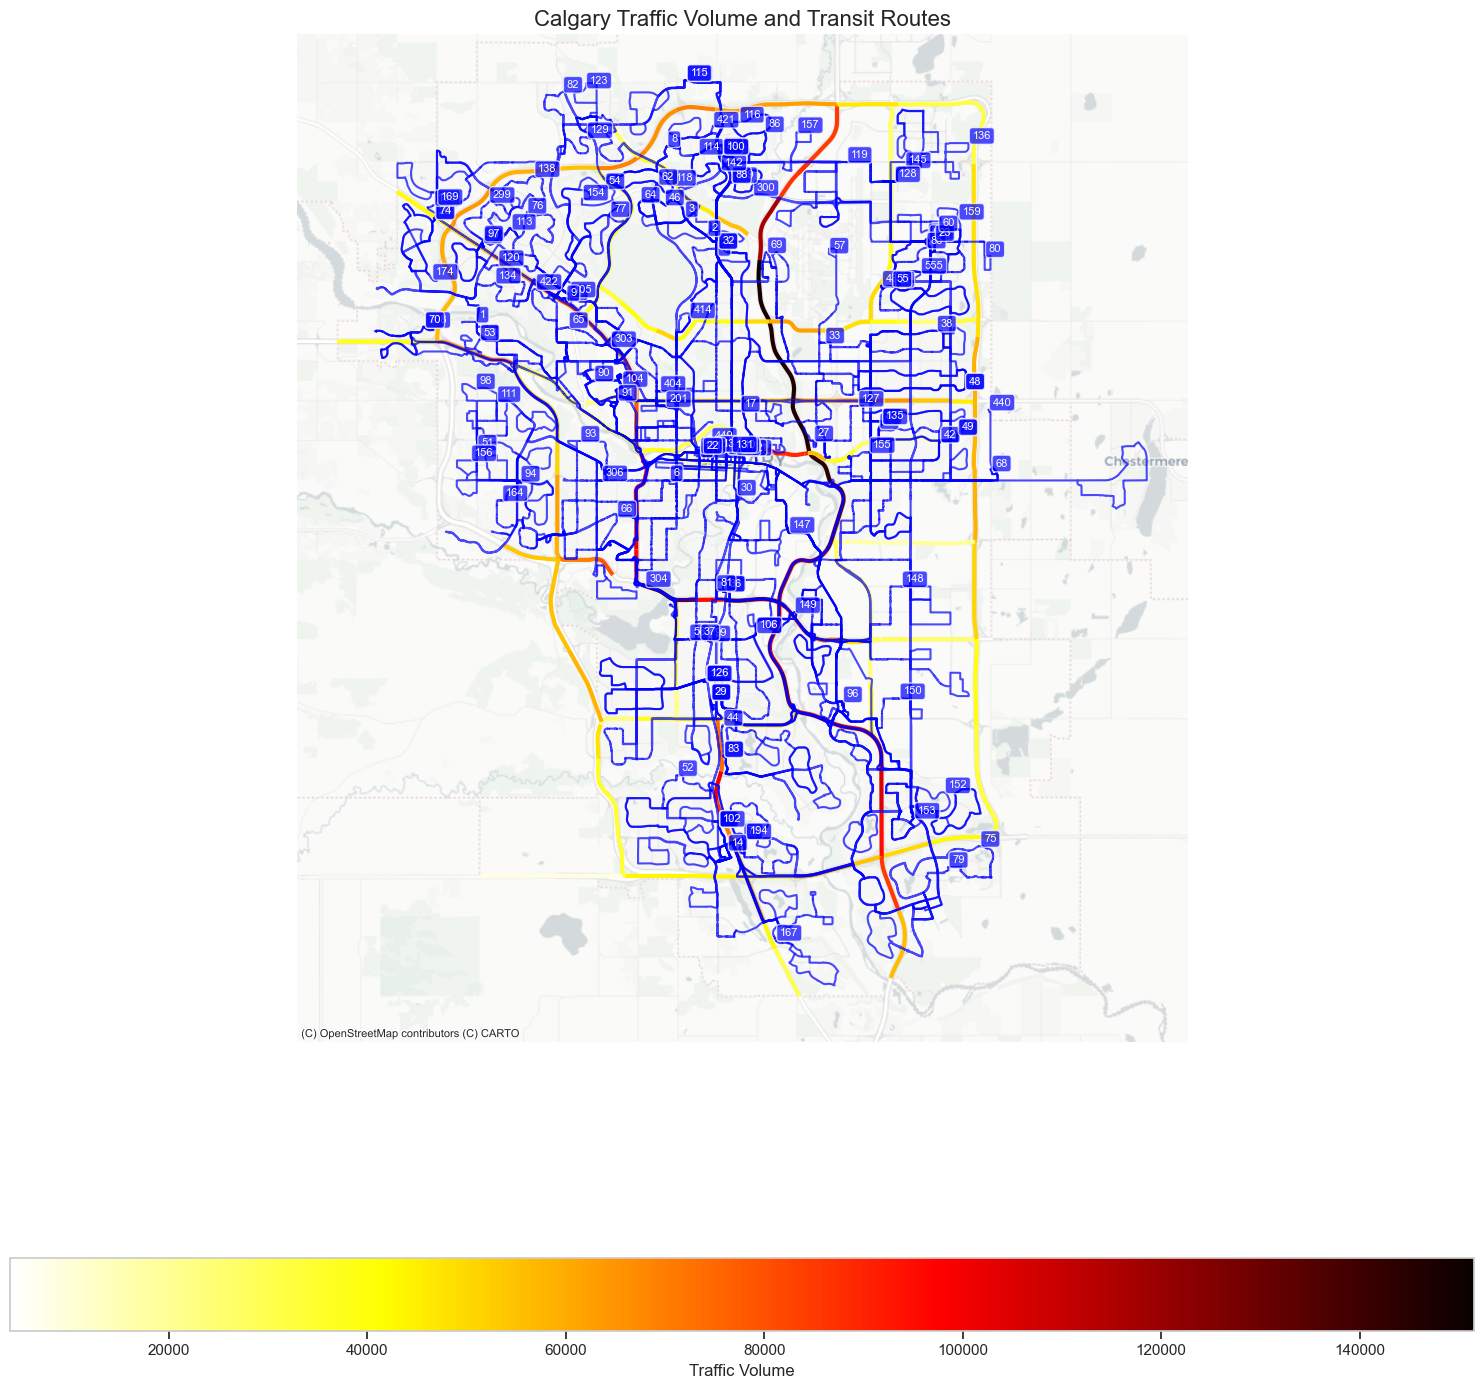

Map visualization complete!


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import contextily as ctx
import numpy as np
import pandas as pd
from shapely.geometry import MultiLineString

def load_traffic_data(traffic_file):
    """Load traffic volume data from GeoJSON file."""
    traffic_data = gpd.read_file(traffic_file)
    # Clean volume data (remove commas and convert to int)
    traffic_data['Volume'] = traffic_data['Volume'].str.replace(',', '').astype(int)
    return traffic_data

def load_transit_data(transit_file):
    """Load transit route data from GeoJSON file."""
    transit_data = gpd.read_file(transit_file)
    return transit_data

def create_traffic_transit_map(traffic_data, transit_data, output_file='calgary_traffic_transit_map.png'):
    """Create a map visualizing traffic volume along transit routes."""
    # Ensure data is in Web Mercator projection (EPSG:3857) for base map compatibility
    if traffic_data.crs is None:
        traffic_data.crs = "EPSG:4326"
    if transit_data.crs is None:
        transit_data.crs = "EPSG:4326"
        
    traffic_data = traffic_data.to_crs(epsg=3857)
    transit_data = transit_data.to_crs(epsg=3857)
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(15, 15))
    
    # Define color map for traffic volume
    vmin = traffic_data['Volume'].min()
    vmax = traffic_data['Volume'].max()
    norm = colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = plt.cm.hot_r  # Hot color map reversed (red is high traffic)
    
    # Plot traffic data with color representing volume
    traffic_data.plot(ax=ax, column='Volume', cmap=cmap, norm=norm, linewidth=3, 
                      legend=True, legend_kwds={'label': 'Traffic Volume', 'orientation': 'horizontal'})
    
    # Plot transit routes
    transit_data.plot(ax=ax, color='blue', linewidth=1.5, alpha=0.7)
    
    # Add route labels for transit data
    for idx, row in transit_data.iterrows():
        # Get a point from each route for label placement (middle point of first line segment)
        if isinstance(row.geometry, MultiLineString):
            route_points = list(row.geometry.geoms)[0].coords
            if len(route_points) > 1:
                midpoint_idx = len(route_points) // 2
                x, y = route_points[midpoint_idx]
                plt.annotate(str(row['ROUTE_SHORT_NAME']), xy=(x, y), xytext=(3, 3),
                             textcoords="offset points", fontsize=8, color='white',
                             bbox=dict(boxstyle="round,pad=0.3", fc='blue', alpha=0.7))
    
    # Add basemap
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
    
    # Add title and labels
    plt.title('Calgary Traffic Volume and Transit Routes', fontsize=16)
    plt.axis('off')
    
    # Adjust layout
    plt.tight_layout()
    
    # Save figure
    # plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()
    
    return fig, ax

def main():
    # File paths for your GeoJSON files
    traffic_file = 'Traffic-Volume.geojson'
    transit_file = 'Calgary_Transit_Routes_clean.geojson'
    
    # Load data
    print("Loading traffic data...")
    traffic_data = load_traffic_data(traffic_file)
    print(f"Loaded {len(traffic_data)} traffic segments")
    
    print("Loading transit data...")
    transit_data = load_transit_data(transit_file)
    print(f"Loaded {len(transit_data)} transit routes")
    
    # Create map visualization
    print("Creating map visualization...")
    fig, ax = create_traffic_transit_map(traffic_data, transit_data)
    
    print("Map visualization complete!")

if __name__ == "__main__":
    main()

# Next steps:
- Clean traffic incident dataset 
    - 2023, 2024, 2025 
    - Only include incidents that involve vehicles, blocked lanes or traffic incidents in general.
    - Anything construction,weather, equipment related can be ignored.


- create heatmap for incidents along routes
- include traffic volume to help draw conclusions
- maybe traffic incidents would reduce usability of bus lanes

## Final Steps for processing and analysis:
- Combine datasets 
- export to a csv
- tally the vehicle incidents
- traffic volume as well